In [1]:
import matplotlib
from scipy import stats
import numpy as np
import pandas as pd
import json
from matplotlib import pyplot as plt

In [2]:
#Read file and set CSV df + decode using 'latin1'
ru_df = pd.read_csv('../resources/RUvideos102.csv',encoding='utf-8')
ru_df=ru_df.dropna(how='any')
ru_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,17.14.11,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,11/13/2017 4:09,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
1,AOCJIFEA_jE,17.14.11,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,11/13/2017 12:32,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
2,VAWNQDgwwOM,17.14.11,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,11/13/2017 11:11,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...
3,gknkFwKQfHg,17.14.11,Сочная кесадилья с курицей,Hochland,22,11/13/2017 1:51,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома
4,3sYvZcwzZr8,17.14.11,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,11/13/2017 11:52,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40734,OMmR9THjVKM,18.14.06,У меня СДВГ! (Story booth на русском) Русская ...,Pastime Time,22,6/13/2018 9:47,"story booth на русском|""story booth перевод""|""...",129488,5893,164,990,https://i.ytimg.com/vi/OMmR9THjVKM/default.jpg,False,False,False,Котики в Blade and Soul - https://bit.ly/2JoOq...
40735,tX7p7NtNVDE,18.14.06,Мои Детские Травмы 2 (анимация),CaGArt,23,6/12/2018 5:38,"кагарт|""каги""|""цагарт""|""гагарт""|""какарт""|""милш...",99163,4659,337,692,https://i.ytimg.com/vi/tX7p7NtNVDE/default.jpg,False,False,False,Мои Детские Травмы 2 (анимация) ▶️Ск...
40736,KAyj5Xm1C64,18.14.06,[ENG SUB] BTS PROM PARTY 2018 Intro + 2nd Gran...,DaisyxBTS 07,24,6/13/2018 8:51,[none],449611,24808,93,974,https://i.ytimg.com/vi/KAyj5Xm1C64/default.jpg,False,False,False,***I do NOT own anything. Just want to share t...
40737,4PiSLIrsSiY,18.14.06,ОБЗОР ВАННОЙ КОМНАТЫ🛁/ТУАЛЕТНОЙ КОМНАТЫ🚽 + ДЕК...,Ксюша Лебедева,22,6/12/2018 20:23,"рум тур ванной комнаты|""room tour bathroom""|""д...",14225,793,39,209,https://i.ytimg.com/vi/4PiSLIrsSiY/default.jpg,False,False,False,"Обзор ванной комнаты, туалетной комнаты+ декор..."


In [51]:
#read json file
file = open('../resources/RU_category_id.json')
ru_json = json.load(file)

In [52]:
#Replace category id with category name
length = len(ru_json["items"])
length

ru_df["category_id"] = ru_df["category_id"].astype(str)

for x in range(length):
    id_number = ru_json["items"][x]["id"]
    category_name = ru_json["items"][x]["snippet"]["title"]
    ru_df["category_id"] = ru_df["category_id"].replace({f"{id_number}": f"{category_name}"})
    
ru_df["category_id"] = ru_df["category_id"].replace({"29": "Nonprofits & Activism"})
    
ru_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,17.14.11,Захар и Полина учатся экономить,Т—Ж БОГАЧ,People & Blogs,11/13/2017 4:09,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
1,AOCJIFEA_jE,17.14.11,Биржа Мемов #29. Большой выпуск,Druzhko Show,People & Blogs,11/13/2017 12:32,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
2,VAWNQDgwwOM,17.14.11,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,Entertainment,11/13/2017 11:11,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...
3,gknkFwKQfHg,17.14.11,Сочная кесадилья с курицей,Hochland,People & Blogs,11/13/2017 1:51,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома
4,3sYvZcwzZr8,17.14.11,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,Entertainment,11/13/2017 11:52,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...


In [104]:
#Count #videos in each category
ru_count_df = pd.DataFrame(ru_df.groupby("category_id").count(), columns=["video_id"])
ru_count_df = ru_count_df.rename(columns={"video_id": "count"})
#ru_count_df_views = ru_count_df.sort_values(by=["count"], ascending=False)
ru_count_df

,count
category_id,
Autos & Vehicles,1558
Comedy,2984
Education,663
Entertainment,5846
Film & Animation,2838
Gaming,1025
Howto & Style,1964
Movies,1
Music,1832


In [54]:
group_by_category = ru_df.groupby('category_id')

In [55]:
#likes per category
likes_count = group_by_category['likes'].sum()
likes_count

category_id
Autos & Vehicles          21209660
Comedy                    69217260
Education                  2135091
Entertainment             98727452
Film & Animation          19073874
Gaming                    12519182
Howto & Style             12655013
Movies                        1732
Music                    119116574
News & Politics           14618500
Nonprofits & Activism     19731473
People & Blogs            71210039
Pets & Animals             2321366
Science & Technology      25604634
Shows                       532349
Sports                    11321301
Travel & Events             921147
Name: likes, dtype: int64

In [56]:
#dislikes per category
dislikes_count = group_by_category['dislikes'].sum()
dislikes_count

category_id
Autos & Vehicles          1472198
Comedy                    7037834
Education                  135840
Entertainment             9433382
Film & Animation          1170124
Gaming                     679992
Howto & Style              616627
Movies                        138
Music                     8023506
News & Politics           8714355
Nonprofits & Activism     7575525
People & Blogs           10443840
Pets & Animals             117533
Science & Technology      1424678
Shows                       93135
Sports                     694239
Travel & Events             99665
Name: dislikes, dtype: int64

In [57]:
#number of videos trending per category
trending_count = group_by_category['views'].count()
trending_count

category_id
Autos & Vehicles         1558
Comedy                   2984
Education                 663
Entertainment            5846
Film & Animation         2838
Gaming                   1025
Howto & Style            1964
Movies                      1
Music                    1832
News & Politics          4929
Nonprofits & Activism    1428
People & Blogs           9226
Pets & Animals            577
Science & Technology     1113
Shows                     194
Sports                   1842
Travel & Events           255
Name: views, dtype: int64

In [58]:
#comments per category
comment_count = group_by_category['comment_count'].sum()
comment_count

category_id
Autos & Vehicles          2242465
Comedy                    8163245
Education                  247506
Entertainment            14289561
Film & Animation          2122557
Gaming                    1618641
Howto & Style             1603661
Movies                        196
Music                    13122800
News & Politics           4556736
Nonprofits & Activism     4280801
People & Blogs           11179410
Pets & Animals             381757
Science & Technology      5656716
Shows                      127959
Sports                    1369291
Travel & Events            182418
Name: comment_count, dtype: int64

In [59]:
views_likes_dislikes = pd.DataFrame({
    'Trending': trending_count,
    'Likes': likes_count, 
    'Dislikes': dislikes_count,
    'Comments': comment_count
})
views_likes_dislikes
vlk_sorted = views_likes_dislikes.sort_values(by=["Trending"], ascending=False)
vlk_sorted

,Trending,Likes,Dislikes,Comments
category_id,,,,
People & Blogs,9226,71210039,10443840,11179410
Entertainment,5846,98727452,9433382,14289561
News & Politics,4929,14618500,8714355,4556736
Comedy,2984,69217260,7037834,8163245
Film & Animation,2838,19073874,1170124,2122557
Howto & Style,1964,12655013,616627,1603661
Sports,1842,11321301,694239,1369291
Music,1832,119116574,8023506,13122800
Autos & Vehicles,1558,21209660,1472198,2242465


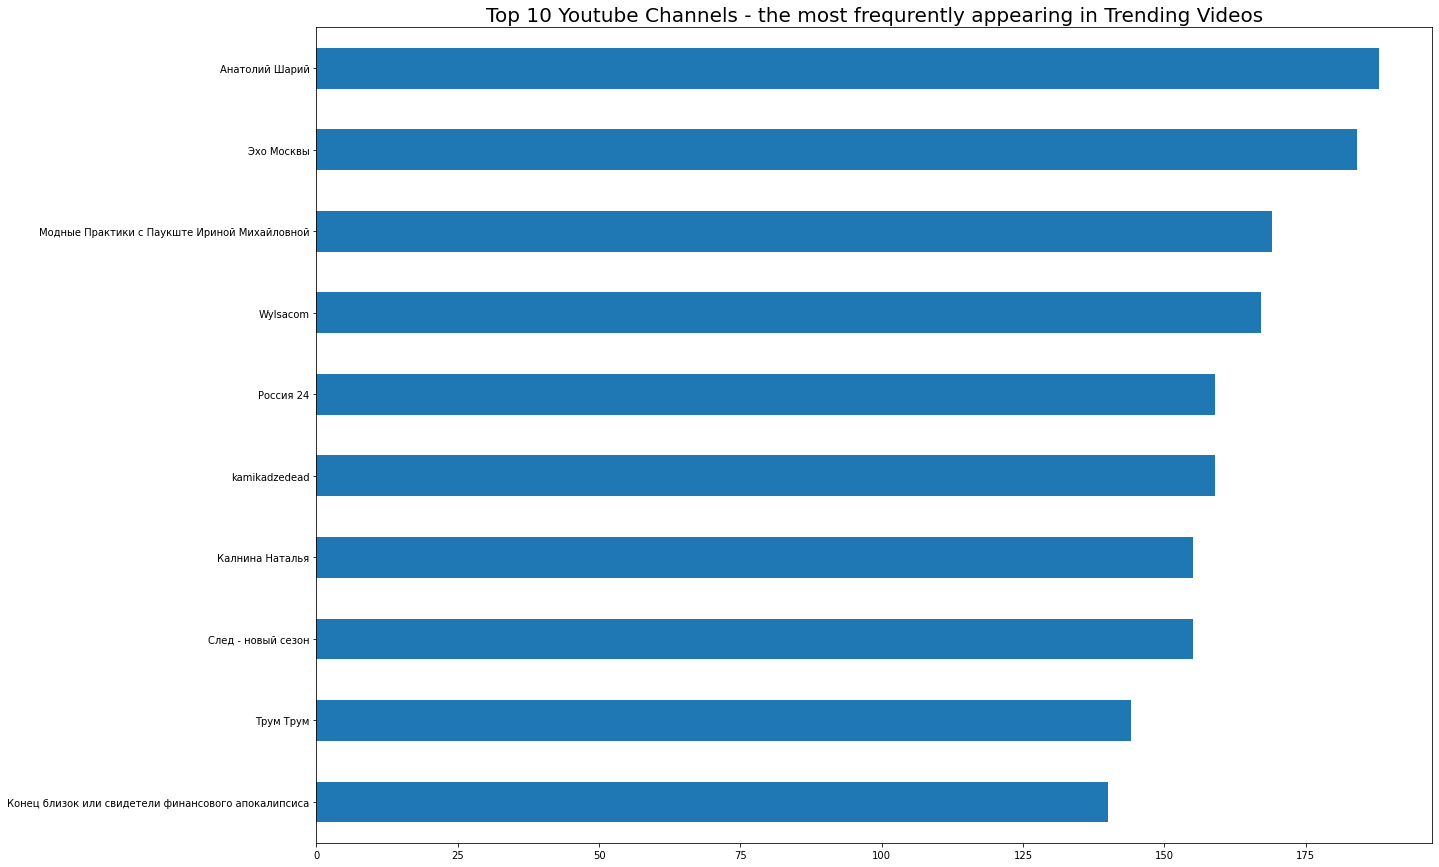

In [60]:
#Top 15 Youtube channels - most frequently appearing in Trendin List
ru_df['channel_title'].value_counts().head(10).sort_values().plot(kind='barh', figsize=(20,15))
plt.title("Top 10 Youtube Channels - the most frequrently appearing in Trending Videos", size=20)
plt.show()

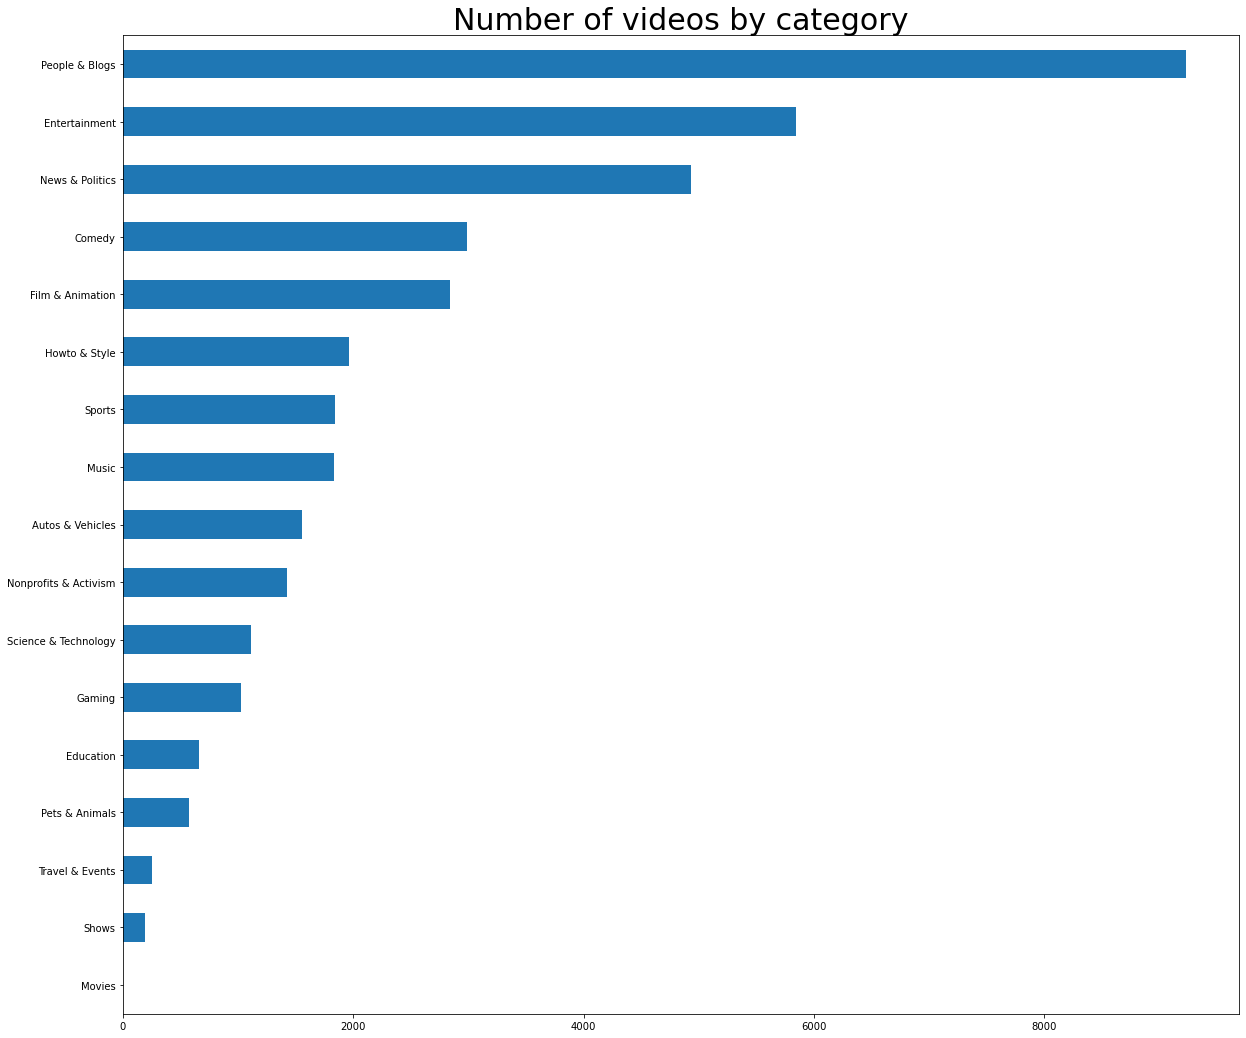

In [61]:
ru_df['category_id'].value_counts().sort_values().plot(kind='barh', figsize=(20,18))
plt.title("Number of videos by category", size=30)
plt.show()

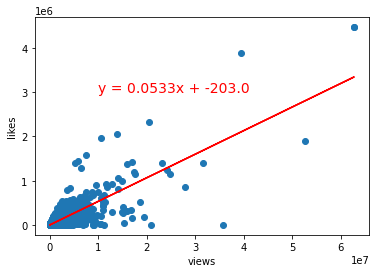

In [62]:
# views vs likes on Russian videos
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(ru_df["views"], ru_df["likes"])
regress_value = ru_df["views"] * slope + intercept
line_eq = f"y = {round(slope, 4)}x + {round(intercept, 0)}"
plt.plot(ru_df["views"], regress_value, "r-")
plt.annotate(line_eq, (1e7, 3e6), fontsize=14, color="red")
plt.scatter(ru_df["views"], ru_df["likes"])
plt.xlabel("views")
plt.ylabel("likes")
plt.show()

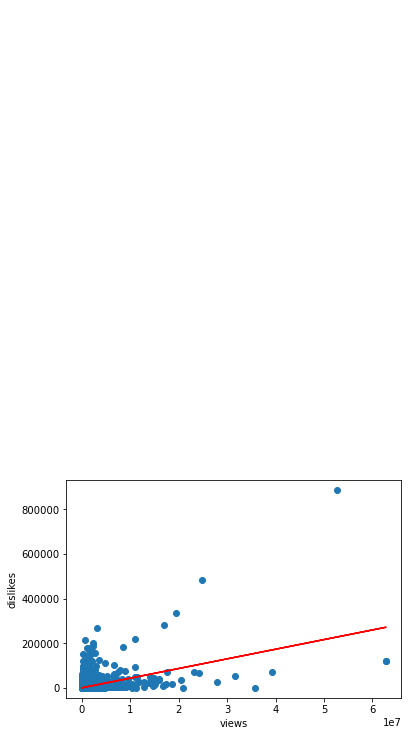

In [63]:
# views vs dislikes on all videos
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(ru_df["views"], ru_df["dislikes"])
regress_value = ru_df["views"] * slope + intercept
line_eq = f"y = {round(slope, 4)}x + {round(intercept, 0)}"
plt.plot(ru_df["views"], regress_value, "r-")
plt.annotate(line_eq, (1e7, 3e6), fontsize=14, color="red")
plt.scatter(ru_df["views"], ru_df["dislikes"])
plt.xlabel("views")
plt.ylabel("dislikes")
plt.show()

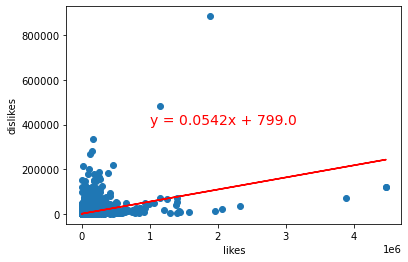

In [64]:
# likes vs dislikes on all videos
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(ru_df["likes"], ru_df["dislikes"])
regress_value = ru_df["likes"] * slope + intercept
line_eq = f"y = {round(slope, 4)}x + {round(intercept, 0)}"
plt.plot(ru_df["likes"], regress_value, "r-")
plt.annotate(line_eq, (1e6, 4e5), fontsize=14, color="red")
plt.scatter(ru_df["likes"], ru_df["dislikes"])
plt.xlabel("likes")
plt.ylabel("dislikes")
plt.show()

In [65]:
#how many videos in whcih categories have comments/ratings disabled + videos removed
ru_no_comment_df = ru_df.loc[ru_df["comments_disabled"] == True, :]
ru_no_rate_df = ru_df.loc[ru_df["ratings_disabled"] == True, :]
ru_no_video_df = ru_df.loc[ru_df["video_error_or_removed"] == True, :]

#kr_no_comment_df["category_id"].value_counts()
#kr_no_rate_df["category_id"].value_counts()
ru_no_video_df["category_id"].value_counts()

Film & Animation        6
News & Politics         1
People & Blogs          1
Science & Technology    1
Howto & Style           1
Name: category_id, dtype: int64

In [66]:
ru_no_video_df.describe()

,views,likes,dislikes,comment_count
count,10.000000,10.000000,10.000000,10.000000
mean,139907.300000,6749.700000,1138.900000,707.900000
std,244081.047087,9523.595388,1958.840839,813.207839
min,2961.000000,61.000000,0.000000,0.000000
25%,21206.750000,599.250000,20.500000,97.000000
50%,68502.500000,1884.000000,183.000000,415.000000
75%,116694.750000,10118.750000,873.250000,1132.250000
max,820475.000000,30390.000000,5069.000000,2334.000000


In [67]:
(ru_df['channel_title'].value_counts()).head(10)

Анатолий Шарий                                         188
Эхо Москвы                                             184
Модные Практики с Паукште Ириной Михайловной           169
Wylsacom                                               167
kamikadzedead                                          159
Россия 24                                              159
След - новый сезон                                     155
Калнина Наталья                                        155
Трум Трум                                              144
Конец близок или свидетели финансового апокалипсиса    140
Name: channel_title, dtype: int64

In [211]:
channel_title = ru_df['channel_title']
video_title = ru_df['title']
category_id = ru_df['category_id']
comments = ru_df['comment_count']
likes = ru_df['likes']
dislikes = ru_df['dislikes']
views = ru_df['views']
reactions = likes + dislikes + comments
ratios = ru_count_df['reactions']/ru_count_df['views']

In [69]:
ru_df_names = pd.DataFrame({'channel title': channel_title,
                       'video title': video_title,
                       'category': category_id,
                       'views': views,
                       'reactions': reactions,
                       'likes': likes,
                       'dislikes': dislikes,
                       'comments': comments})
ru_df_names.head(10).sort_values(by=["views"], ascending=False)

,channel title,video title,category,views,reactions,likes,dislikes,comments
6,ТОПЛЕС,ЗАМОРОЗКА ЧЕЛОВЕКА + 1 К БЕССМЕРТИЮ — ТОПЛЕС,Science & Technology,1131851,85233,78692,2427,4114
5,versusbattleru,АНОНС / Versus Fresh Blood 4: Война Стилей,Entertainment,733936,54410,47964,2545,3901
9,Официальный канал КВН,КВН 2017 Высшая лига Вторая 1/2 (12.11.2017) И...,Comedy,442228,12397,3194,5985,3218
2,Юлик,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Entertainment,424596,53512,49854,714,2944
1,Druzhko Show,Биржа Мемов #29. Большой выпуск,People & Blogs,330043,49062,43841,2244,2977
4,Совергон,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Entertainment,243469,38539,36216,631,1692
3,Hochland,Сочная кесадилья с курицей,People & Blogs,112851,3768,3566,122,80
8,Итальянцы by Kuzno Productions,Итальянцы VS русская народная медицина,Entertainment,105116,11057,9780,93,1184
7,Нет застройке без согласия,"РПЦ незаконно строит храм, полиция смотрит как...",People & Blogs,97006,3476,2259,330,887
0,Т—Ж БОГАЧ,Захар и Полина учатся экономить,People & Blogs,62408,574,334,190,50


In [209]:
#Reactions per category
#Create new df with categories, views, reactions
ru_reactions = ru_df_names.groupby("category").sum()['reactions']
ru_reactions
ru_count_df['reactions']=ru_reactions
ru_views = ru_df_names.groupby('category').sum()['views']
ru_views
ru_count_df['views']=ru_views
ru_count_df = ru_count_df.sort_values(by=["count"], ascending=False)
ru_count_df

,count,reactions,views
category_id,,,
People & Blogs,9226,92833289,1474029670
Entertainment,5846,122450395,2073891030
News & Politics,4929,27889591,689704209
Comedy,2984,84418339,1007604701
Film & Animation,2838,22366555,514397049
Howto & Style,1964,14875301,384435294
Sports,1842,13384831,366512976
Music,1832,140262880,1592782962
Autos & Vehicles,1558,24924323,383321298


<function matplotlib.pyplot.show(*args, **kw)>

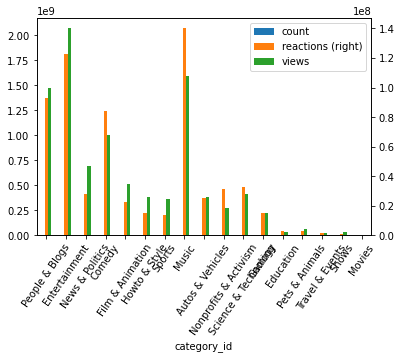

In [188]:
#create double bar chart with views and reactions
ru_count_df.plot(kind='bar', secondary_y = 'reactions', rot = 55)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

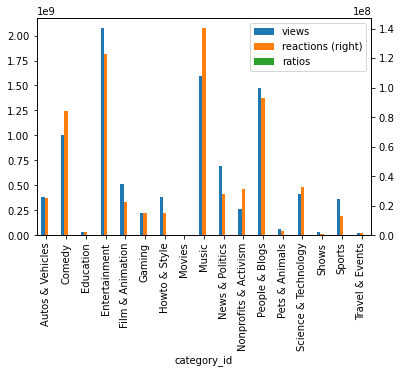

In [264]:
#Create new df with views & reaction ratios
ru_reactions_df = pd.DataFrame(ru_count_df.groupby("category_id").sum(), columns=["views", "reactions"])
#ru_count_df_views = ru_count_df.sort_values(by=["count"], ascending=False)
ru_reactions_df
ru_reactions_df['ratios'] = ru_reactions_df['views']/ru_reactions_df['reactions']
ru_reactions_df
ru_reactions_df.plot(kind='bar', secondary_y = 'reactions', rot = 90)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

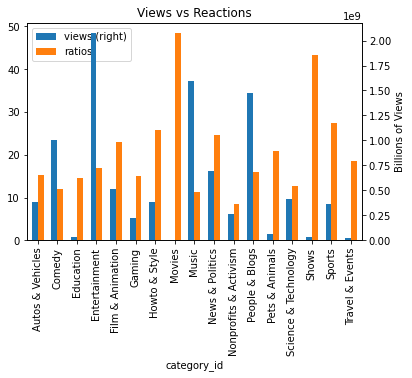

In [280]:
reactions_df_final = ru_reactions_df[['views', 'ratios']]
reactions_df_final 
reactions_df_final.plot(kind='bar', secondary_y = 'views', rot = 90, width = .6)
plt.xlabel('Category')
plt.ylabel('Billions of Views')
plt.title('Views vs Reactions')
plt.show

Text(0.5, 0, 'Category')

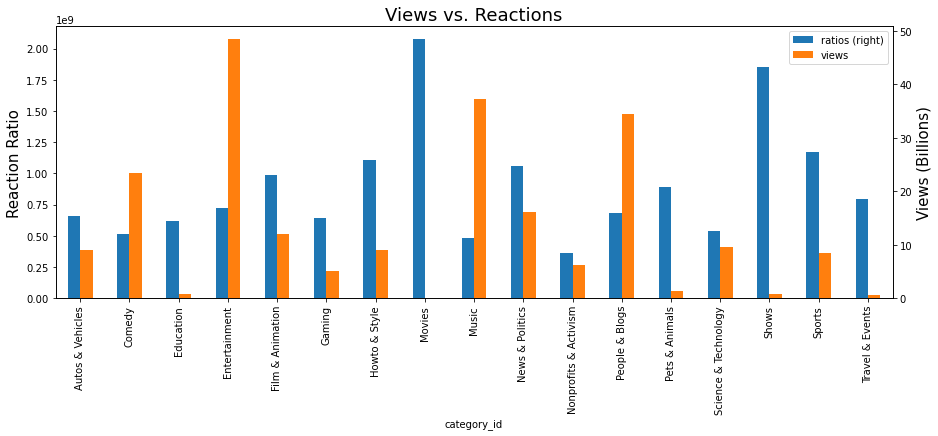

In [298]:
reactions_df_final = ru_reactions_df[['ratios', 'views']]
reactions_df_final
reactions_df_final.plot.bar(figsize=(15,5), secondary_y= 'ratios')

ax1, ax2 = plt.gcf().get_axes() # gets the current figure and then the axes

ax1.set_ylabel('Reaction Ratio', fontsize =15)

ax2.set_ylabel('Views (Billions)', fontsize =15)
plt.title('Views vs. Reactions', fontsize =18)
plt.xlabel('Category', fontsize = 20)

In [143]:
print(ru_count_df['reactions'].max())
print('____')
print(ru_count_df['views'].max())

140262880
____
2073891030


In [147]:
ru_count_df.index

Index(['People & Blogs', 'Entertainment', 'News & Politics', 'Comedy',
       'Film & Animation', 'Howto & Style', 'Sports', 'Music',
       'Autos & Vehicles', 'Nonprofits & Activism', 'Science & Technology',
       'Gaming', 'Education', 'Pets & Animals', 'Travel & Events', 'Shows',
       'Movies'],
      dtype='object', name='category_id')

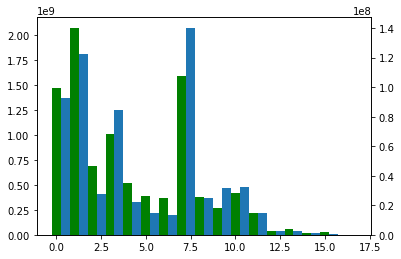

In [176]:
#Double bar graph
w =.5
ax1 = plt.subplot(1,1,1)
#plt.xticks(np.arange(len(ru_count_df)))+w/2.0, ru_count_df.index
ax1.bar(np.arange(len(ru_count_df)), ru_count_df['views'], width=w, align='center', color ="g")
ax2 = ax1.twinx()
ax2.bar(np.arange(len(ru_count_df))+w,ru_count_df['reactions'], width=w, align='center')


plt.show()

In [166]:
np.arange(len(ru_count_df))


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

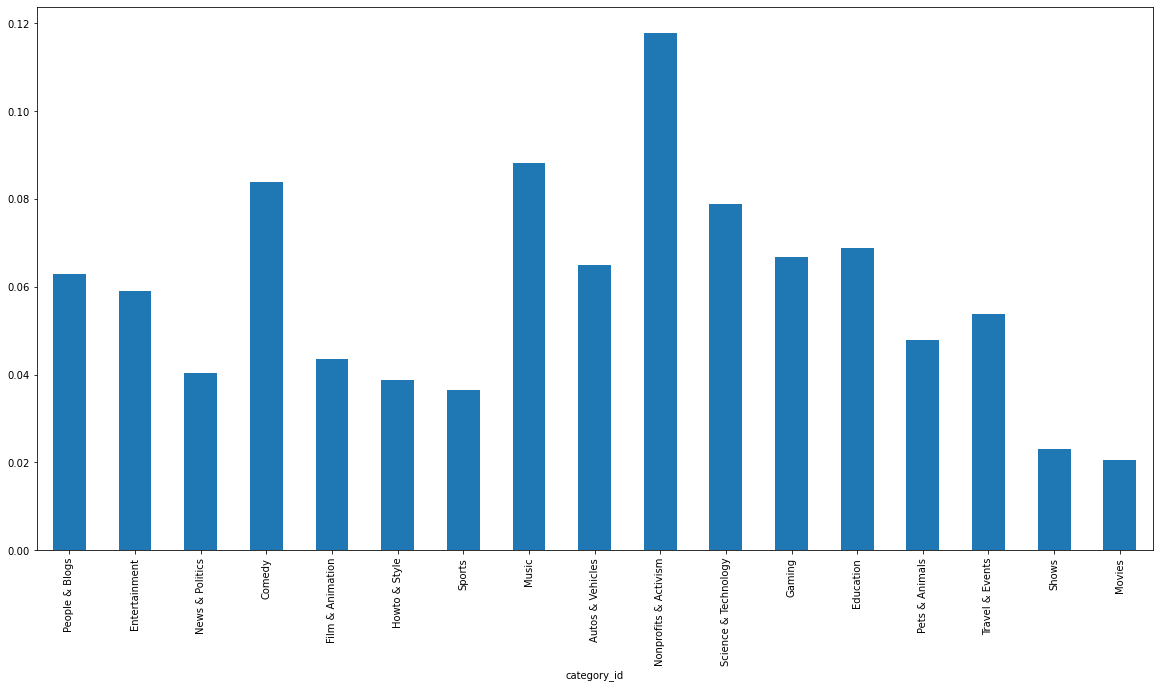

In [146]:
ratios = ru_count_df['reactions']/ru_count_df['views']
ratios.plot(subplots=False, kind="bar", figsize=(20,10))
plt.show()

In [335]:
views_likes_dislikes_reactions = pd.DataFrame({
    'Trending': trending_count,
    'Likes': likes_count, 
    'Dislikes': dislikes_count,
    'Comments': comment_count,
    'Reactions': ru_count_df['reactions']
})
views_likes_dislikes_reactions
vlkr_sorted = views_likes_dislikes_reactions.sort_values(by=["Trending"], ascending=False)
vlkr_sorted

,Trending,Likes,Dislikes,Comments,Reactions
People & Blogs,9226,71210039,10443840,11179410,92833289
Entertainment,5846,98727452,9433382,14289561,122450395
News & Politics,4929,14618500,8714355,4556736,27889591
Comedy,2984,69217260,7037834,8163245,84418339
Film & Animation,2838,19073874,1170124,2122557,22366555
Howto & Style,1964,12655013,616627,1603661,14875301
Sports,1842,11321301,694239,1369291,13384831
Music,1832,119116574,8023506,13122800,140262880
Autos & Vehicles,1558,21209660,1472198,2242465,24924323
Nonprofits & Activism,1428,19731473,7575525,4280801,31587799


,Trending,Likes,Dislikes,Comments
Trending,1.000000,0.572192,0.789322,0.697649
Likes,0.572192,1.000000,0.769434,0.964347
Dislikes,0.789322,0.769434,1.000000,0.864275
Comments,0.697649,0.964347,0.864275,1.000000


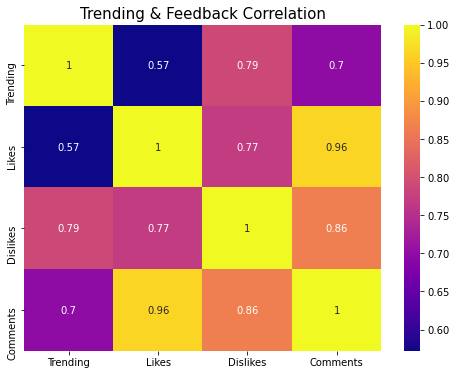

In [338]:
import seaborn as sns
corrmat = vlk_sorted.corr()

plt.figure(figsize=(8,6))
plt.title('Trending & Feedback Correlation', size=15)
sns.heatmap(vlk_sorted.corr(),annot=True,cmap='plasma')

corrmat